# Exploratory Notebook

## Ideas

**How can we optimise the image encoding method for a stable renderer such that human participants can best infer the original *information*?** (not necessarily the original image, just what it represents).

Moreso, how can we do this ***without* knowing what the renderer looks like**?

### "Half"-Autoencoder

Auto-encoders typically train an encoding and decoding network to match an input to the output. 

Can restrictions be placed on the decoding network such that a "half"-autoencoder could be trained? (i.e. training the network to match input to the output, but making most of the training occur in the encoder?)




# Flow

## Digit to Image

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [2]:
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

In [11]:
def digit_to_image(digit : int, xloc : float, yloc : float):
    fig = plt.figure(figsize=(1,1))
    canvas = FigureCanvas(fig)
    ax = plt.gca()
    fig.patch.set_facecolor('black')
    plt.axis('off')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.text(xloc, yloc, str(digit),
             size=48,
             color='white',
             clip_box=ax.clipbox,
             clip_on=True,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             linespacing = 0,
             #bbox=dict(facecolor='red', alpha=0.5),
             transform=ax.transAxes)
    plt.savefig(f'{digit}.png', pad_inches=0, facecolor='black')
#     canvas.draw()
#     width, height = fig.get_size_inches() * fig.get_dpi()
#     image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
#     plt.close(fig)
    #return image

In [6]:
import os
os.chdir('../data/digit-images-aliased')

[None, None, None, None, None, None, None, None, None, None]

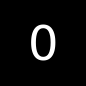

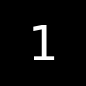

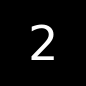

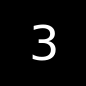

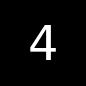

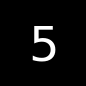

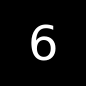

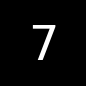

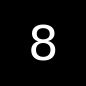

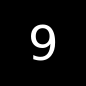

In [12]:
[digit_to_image(d, 0.5, 0.45) for d in range(10)]

In [4]:
%time test = digit_to_image(9,0.5, 0.5)

CPU times: user 42.7 ms, sys: 6.7 ms, total: 49.4 ms
Wall time: 62.8 ms


In [5]:
np.shape(test)

(72, 72, 3)

## Image to Digit

In [6]:
import tensorflow as tf
tf.executing_eagerly()
import keras

Using TensorFlow backend.


In [7]:
import skimage.color as color

In [8]:
# %%time

digit_train_n = 1200
digit_train_truth = np.random.randint(0, 10, digit_train_n)
digit_train_data =  np.array([color.rgb2gray(digit_to_image(digit, random.random()/2, random.random()/2)) for digit in digit_train_truth])

digit_test_n = 600
digit_test_truth = np.random.randint(0, 10, digit_test_n)
digit_test_data =  np.array([color.rgb2gray(digit_to_image(digit, random.random()/2, random.random()/2)) for digit in digit_test_truth])

In [9]:
input_shape = (72, 72)

In [10]:
digit_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(144, activation=tf.nn.relu),  
    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
    #tf.keras.layers.Dense(16, activation=tf.nn.relu), 
    #tf.keras.layers.Dense(64, activation=tf.nn.relu),  
    #tf.keras.layers.Dense(32, activation=tf.nn.relu),  
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
digit_model.fit(digit_train_data, digit_train_truth, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 1s 1ms/sample - loss: 2.2661 - accuracy: 0.1558
Epoch 2/10
1200/1200 [==============================] - 0s 406us/sample - loss: 1.8755 - accuracy: 0.3742
Epoch 3/10
1200/1200 [==============================] - 1s 510us/sample - loss: 1.4736 - accuracy: 0.5250
Epoch 4/10
1200/1200 [==============================] - 0s 385us/sample - loss: 1.1050 - accuracy: 0.6658
Epoch 5/10
1200/1200 [==============================] - 0s 391us/sample - loss: 0.8417 - accuracy: 0.7583
Epoch 6/10
1200/1200 [==============================] - 0s 375us/sample - loss: 0.5996 - accuracy: 0.8475
Epoch 7/10
1200/1200 [==============================] - 0s 365us/sample - loss: 0.4225 - accuracy: 0.8958
Epoch 8/10
1200/1200 [==============================] - 0s 368us/sample - loss: 0.3347 - accuracy: 0.9167
Epoch 9/10
1200/1200 [==============================] - 0s 384us/sample - loss: 0.2307 - accuracy: 0.9600
Epoch 10/10
1200/1200 [=========================

In [13]:
digit_model.evaluate(digit_test_data, digit_test_truth)

600/600 [==============================] - 0s 419us/sample - loss: 0.8974 - accuracy: 0.7300


[0.8974032632509867, 0.73]

In [14]:
predictions = digit_model.predict_on_batch(digit_test_data)

In [15]:
classes = [np.argmax(prediction) for prediction in predictions]

In [16]:
correct = [x[0] == x[1] for x in zip(classes, digit_test_truth)]

## Image to Phosphenes

In [17]:
import os
import sys
sys.path.append(os.path.split(os.getcwd())[0])

In [18]:
from phosphenes import *

In [19]:
%time grid = PolarRegularGrid(12, 12, 64, 64)

CPU times: user 84.8 ms, sys: 7.99 ms, total: 92.8 ms
Wall time: 99.8 ms


In [20]:
%time stimulus = Stimulus(color.rgb2gray(test), grid)

CPU times: user 2.05 ms, sys: 1.02 ms, total: 3.07 ms
Wall time: 1.75 ms


In [21]:
%time render = grid.render(stimulus.vector)

CPU times: user 6.33 ms, sys: 4.52 ms, total: 10.8 ms
Wall time: 10.2 ms


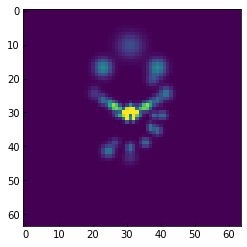

In [22]:
plt.imshow(render)

In [23]:
def image_to_phosphenes(image : np.ndarray):
    global grid
    stimulus = Stimulus(color.rgb2gray(image), grid)
    render = grid.render(stimulus.vector)
    #plt.imshow(render, cmap='gray')
    return (render + 1) / 2

In [24]:
%time render = image_to_phosphenes(digit_to_image(6, 0.5, 0.45))

CPU times: user 41.9 ms, sys: 6.8 ms, total: 48.7 ms
Wall time: 57.1 ms


## Phosphenes to Digit

In [25]:
import tensorflow as tf
import keras
import numpy as np

In [26]:
train_n = 1200
train_truth = np.random.randint(0, 10, train_n)

In [27]:
%time train_data = np.array([image_to_phosphenes(digit_to_image(digit, 0.5, 0.5)) for digit in train_truth])

CPU times: user 38 s, sys: 2.51 s, total: 40.5 s
Wall time: 41.8 s


In [28]:
test_n = 600
test_truth = np.random.randint(0, 10, test_n)

In [29]:
%time test_data = np.array([image_to_phosphenes(digit_to_image(digit, 0.5, 0.5)) for digit in test_truth ])

CPU times: user 18.5 s, sys: 1.57 s, total: 20.1 s
Wall time: 20.7 s


In [30]:
input_shape = (64, 64)

In [31]:
decode_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  
    tf.keras.layers.Dense(32, activation=tf.nn.relu),  
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [32]:
decode_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
decode_model.fit(train_data, train_truth, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 1s 539us/sample - loss: 1.0768 - accuracy: 0.8017
Epoch 2/10
1200/1200 [==============================] - 0s 286us/sample - loss: 0.0290 - accuracy: 1.0000
Epoch 3/10
1200/1200 [==============================] - 0s 266us/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 4/10
1200/1200 [==============================] - 0s 263us/sample - loss: 0.0021 - accuracy: 1.0000
Epoch 5/10
1200/1200 [==============================] - 0s 263us/sample - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
1200/1200 [==============================] - 0s 272us/sample - loss: 9.3736e-04 - accuracy: 1.0000
Epoch 7/10
1200/1200 [==============================] - 0s 258us/sample - loss: 6.9540e-04 - accuracy: 1.0000
Epoch 8/10
1200/1200 [==============================] - 0s 267us/sample - loss: 5.3688e-04 - accuracy: 1.0000
Epoch 9/10
1200/1200 [==============================] - 0s 264us/sample - loss: 4.2613e-04 - accuracy: 1.0000
Epoch 10/10
1200/1200 [=======

In [34]:
decode_model.evaluate(test_data, test_truth)

600/600 [==============================] - 0s 356us/sample - loss: 3.0451e-04 - accuracy: 1.0000


[0.00030451496480964123, 1.0]

# Encoding Network

In [35]:
test = color.rgb2gray(digit_to_image(9, 0.5, 0.5))

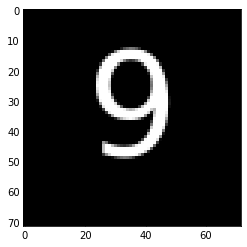

In [36]:
plt.imshow(test, cmap='gray')

In [37]:
input_shape = (72, 72)

In [38]:
output_shape = (12, 12)

In [54]:
def make_encoder_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    model.add(tf.keras.layers.Dense(12*12*6))
    model.add(tf.keras.layers.Dense(12*12))
    #print(model.output_shape)
    return model

In [40]:
test_batch = np.array([test])

In [41]:
test_tensor = tf.convert_to_tensor(test_batch, dtype=tf.float32)

In [43]:
encoder = make_encoder_model()
test_encode = encoder(test_tensor)

(None, 144)


In [44]:
test_render = grid.render(test_encode.numpy()[0])

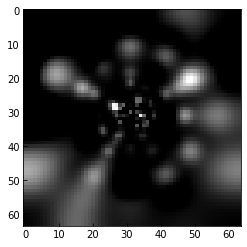

In [45]:
plt.imshow(test_render, cmap='gray')

In [46]:
def decision(encoded):
    encoded_np = encoded.numpy()
    rendered = grid.render(encoded_np[0])
    result = decode_model.predict(np.array([rendered]))
    return result

In [47]:
decision(test_encode)

array([[0.26779255, 0.03573375, 0.03210891, 0.01346466, 0.01801454,
        0.22118224, 0.05962803, 0.18494022, 0.14510848, 0.02202659]],
      dtype=float32)

In [48]:
cce = tf.keras.losses.CategoricalCrossentropy()

In [49]:
encoder_optimiser = tf.keras.optimizers.Adam(1e-4)

In [50]:
EPOCHS = 10

In [68]:
test_tensor[0]

<tf.Tensor: id=9045, shape=(72, 72), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [96]:
grid.render(encoder(test_tensor)[0])

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.9741347 , -0.97160107, -0.9661644 , ..., -0.98577005,
        -0.9861137 , -0.9862605 ],
       [-0.9806204 , -0.9779152 , -0.97212625, ..., -0.9905327 ,
        -0.9910063 , -0.9912161 ],
       [-0.9835712 , -0.9807856 , -0.97483116, ..., -0.9927032 ,
        -0.99323654, -0.9934753 ]], dtype=float32)

In [99]:
def make_decision(encoded_vector):
    global grid
    return decode_model.predict(np.array([grid.render(encoded_vector[0])]))

In [100]:
make_decision(encoder(test_tensor))

array([[0.26779264, 0.03573374, 0.0321089 , 0.01346465, 0.01801452,
        0.22118226, 0.05962803, 0.18494014, 0.14510849, 0.02202658]],
      dtype=float32)

In [ ]:
encoder = make_encoder_model()

In [101]:
#@tf.function
def train_step(digit):
    
    image = color.rgb2gray(digit_to_image(digit, 0.5, 0.5))
    image_tensor = tf.convert_to_tensor(np.array([image]), dtype=tf.float32)
    base = np.zeros(10)
    base[digit] = 1 

    with tf.GradientTape() as encoder_tape:
        
        encoded = encoder(image_tensor, training=True)
        decision = make_decision(encoded)
        result = (base, decision)
        loss = cce(*result)
        
    gradient = encoder_tape.gradient(loss, encoder.trainable_variables)
    encoder_optimiser.apply_gradients(zip(gradient, encoder.trainable_variables))

In [102]:
def train(epochs):
    for digit in np.random.randint(0, 10, 1000):
        train_step(digit)

In [103]:
train(EPOCHS)

ValueError: No gradients provided for any variable: ['dense_7/kernel:0', 'dense_7/bias:0', 'dense_8/kernel:0', 'dense_8/bias:0'].

In [79]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 256
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

11493376/11490434 [==============================] - 20s 2us/step


In [80]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

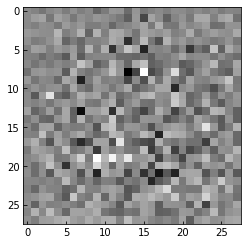

In [81]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [82]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [83]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00034623]], shape=(1, 1), dtype=float32)


In [84]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [85]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [86]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [87]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [88]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [89]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [90]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [91]:
train(train_dataset, EPOCHS)

KeyboardInterrupt: 